# **EXERCISE 1**

In [1]:
import numpy as np 
import os

In [186]:
def read_one (path):
    band = np.loadtxt(path, delimiter =",")[:,2] .reshape(350, 300) 
    return band

In [187]:
def read_many (path):
    lband = []
    for root , dirs , files in os.walk(path ):
        for file in files:
            tmp = path + "\\" + file 
            band = read_one (tmp) 
            lband.append (band)
    stack = np.dstack(np.array(lband)) 
    return stack


In [188]:
path_in = r"F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\L13 Scientific Plotting\Scientific Plotting\data\csv" 
stack = read_many(path_in)  
print(stack.shape)

(350, 300, 31)


In [189]:
path_in2 = r"F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\L13 Scientific Plotting\Scientific Plotting\data\csv\2014_18.csv" 
one = read_one(path_in2)
print(one.shape)
print(one.ndim)
print(one.size)

(350, 300)
2
105000


In [190]:
type(one)

numpy.ndarray

In [191]:
one[one==-9999.0] = np.nan

In [192]:
one.min()

nan

In [193]:
np.nanmin(one)

7.31549

In [194]:
np.nanmax(one)

11.3609

In [195]:
np.where(one==np.nanmin(one))

(array([53], dtype=int64), array([124], dtype=int64))

In [196]:
np.where(one==np.nanmax(one))

(array([321], dtype=int64), array([183], dtype=int64))

# **EXERCISE 2**

In [9]:
import matplotlib.pyplot as plt
plt.imshow(one)
plt.colorbar(label='temp', orientation='horizontal')

NameError: name 'one' is not defined

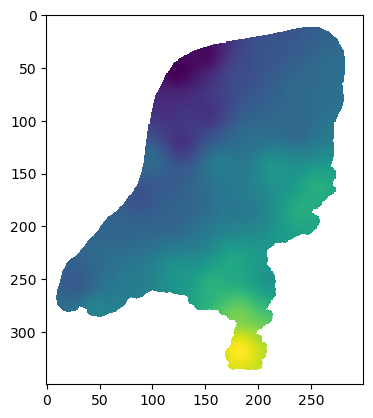

In [198]:
plt.imshow(one,interpolation= 'nearest')

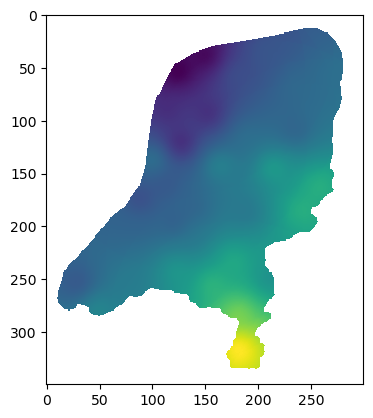

In [199]:
plt.imshow(one,interpolation= 'spline16')

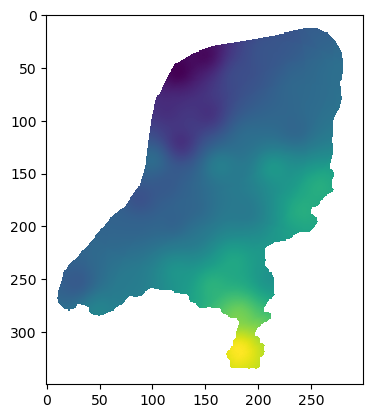

In [200]:
plt.imshow(one,interpolation= 'bicubic')

# **EXERCISE 3**

In [201]:
path_in3 = r"F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\L13 Scientific Plotting\Scientific Plotting\data\csv\2014_10.csv" 
band10 = read_one(path_in3)
path_in4 = r"F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\L13 Scientific Plotting\Scientific Plotting\data\csv\2014_20.csv" 
band20 = read_one(path_in4)
band10[band10==-9999]=np.nan
band20[band20==-9999]=np.nan
np.size(band1)


105000

In [202]:
np.size(band2)

105000

In [203]:
band3 = band20 - band10

In [204]:
np.size(band3)

105000

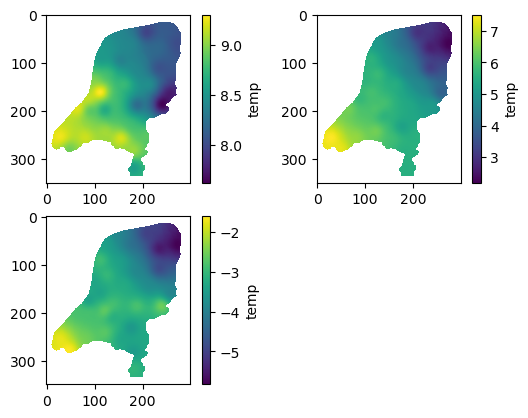

In [205]:
plt.subplot(2,2,1,label='2014_10') #label not showing??
plt.imshow(band10)
plt.colorbar(label='temp')
plt.subplot(2,2,2)
plt.imshow(band20)
plt.colorbar(label='temp')
plt.subplot(2,2,3)
plt.imshow(band3) 
plt.colorbar(label='temp')
#how to print all colorbars in 1 line code?

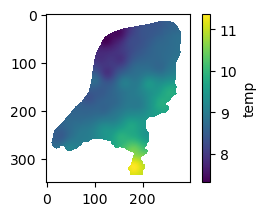

In [269]:
path_in5 = r"F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\L13 Scientific Plotting\Scientific Plotting\data\csv\2014_18.csv" 
band18 = read_one(path_in5)
band18[band18==-9999]=np.nan
plt.subplot(2,2,1)
plt.imshow(band18)
plt.colorbar(label='temp')

# **EXERCISE 4**

In [207]:
array = np.zeros((350,300))
array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [208]:
band18

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [209]:
np.where(band18==np.nanmin(band18))
# np.shape(band18)
lowtmp = np.where(band18==np.nanmin(band18))
type(lowtmp)

tuple

In [234]:
rowpos = lowtmp[0]
colpos = lowtmp[1]
len(rowpos)

1

In [239]:
for i in range (len(rowpos)):
    rowidx = rowpos[i]
    colidx = colpos[i]
    [rowidx,colidx]=-1

TypeError: cannot unpack non-iterable int object

In [ ]:
hightmp = np.where(band18==np.nanmax(band18))

rowpos = hightmp[0]
colpos = hightmp[1]

In [ ]:
hightmp

In [ ]:
array[53,124]=-1
array[321,183]=1
array[53,124]

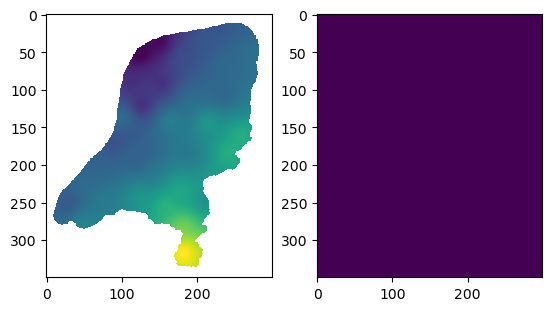

In [267]:
plt.subplot(1,2,1)
plt.imshow(band18)
plt.subplot(1,2,2)
plt.imshow(array)

In [218]:
stack.size

3255000

# **EXERCISE 5**

In [270]:
print(stack[50][250])
amster = stack[50][250]
amster[:7]
np.mean(amster[:7]) # mean of first 7 days
mean = np.mean(amster) # mean of whole month

[ 8.66476    8.10367    6.7018     6.35529    8.8682     7.19761
  5.4239     8.06858    8.55868    8.67697    6.11872   10.6685
  2.66187    1.40277    2.03596    2.75796    0.675441   0.121035
  0.605313   3.8337     5.7895    -0.026625  10.4575    -0.0218277
  4.22088    8.2048     7.36443   12.6986    11.0204     9.6436
 11.2197   ]


# EXERCISE 6

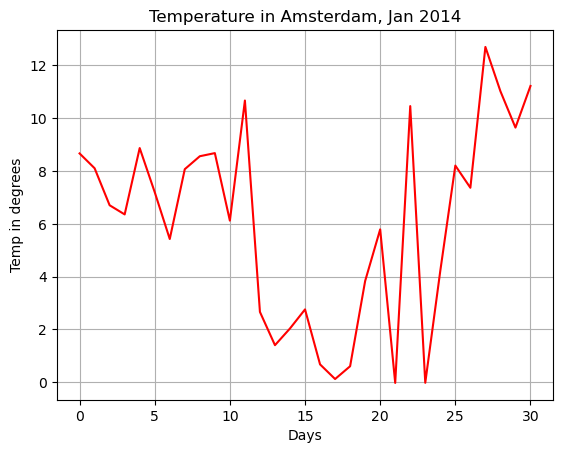

In [288]:
plt.plot(stack[50,250],color='r')
plt.xlabel('Days')
plt.ylabel('Temp in degrees')
plt.title('Temperature in Amsterdam, Jan 2014')
plt.grid()


In [266]:
type(band_mean)

numpy.float64

# EXERCISE 7

In [284]:
type(amster)
band_mean = np.mean(stack,axis=2)
np.shape(band_mean)

(350, 300)

In [285]:
np.zeros((350,300))
ams = np.mean(band_mean)
for i,j in band_mean:
    

# GRASS

In [6]:
def read_one (path):
    band = np.loadtxt(path, delimiter =" ") 
    return band

def read_many (path):
    lband = []
    for root , dirs , files in os.walk(path):
        for file in files:
            tmp = path + "\\" + file 
            band = read_one (tmp) 
            lband.append (band)
    stack = np.dstack(np.array(lband)) 
    return stack


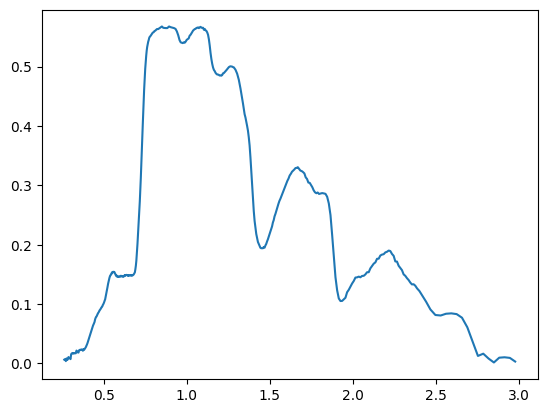

In [21]:
grass1 = read_one(r'F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\L13 Scientific Plotting\Scientific Plotting\challenge\Grass_spectra\grass1.txt')
wav=[]
ref=[]
for i in range(grass1.shape[0]):
    wav.append(grass1[i][0])
    ref.append(grass1[i][1])
    
plt.plot(wav,ref)
    

In [20]:
wav

[0.2636,
 0.2686,
 0.2731,
 0.2771,
 0.2811,
 0.2851,
 0.2891,
 0.2931,
 0.2971,
 0.3011,
 0.3051,
 0.3091,
 0.3131,
 0.3171,
 0.3211,
 0.3251,
 0.3291,
 0.3331,
 0.3371,
 0.3411,
 0.3451,
 0.3491,
 0.3531,
 0.3571,
 0.3606,
 0.3636,
 0.3666,
 0.3696,
 0.3726,
 0.3756,
 0.3786,
 0.3811,
 0.3831,
 0.3851,
 0.3871,
 0.3891,
 0.3911,
 0.3931,
 0.3951,
 0.3971,
 0.3991,
 0.4011,
 0.4031,
 0.4051,
 0.4128,
 0.4158,
 0.4188,
 0.4218,
 0.4248,
 0.4278,
 0.4308,
 0.4338,
 0.4368,
 0.4398,
 0.4428,
 0.4458,
 0.4488,
 0.4513,
 0.4533,
 0.4553,
 0.4573,
 0.4593,
 0.4613,
 0.4633,
 0.4653,
 0.4673,
 0.4693,
 0.4713,
 0.4733,
 0.4753,
 0.4773,
 0.4793,
 0.4813,
 0.4833,
 0.4853,
 0.4873,
 0.4893,
 0.4913,
 0.4933,
 0.4953,
 0.4973,
 0.4993,
 0.5013,
 0.5033,
 0.5053,
 0.5073,
 0.5093,
 0.5113,
 0.5133,
 0.5153,
 0.5173,
 0.5193,
 0.5213,
 0.5233,
 0.5253,
 0.5273,
 0.5293,
 0.5313,
 0.5333,
 0.5353,
 0.5373,
 0.5393,
 0.5413,
 0.5433,
 0.5453,
 0.5473,
 0.5493,
 0.5513,
 0.5533,
 0.5553,
 0.5573,
 

In [12]:
grass1

array([[2.63600e-01, 6.38400e-03],
       [2.68600e-01, 7.29900e-03],
       [2.73100e-01, 3.80100e-03],
       [2.77100e-01, 8.42200e-03],
       [2.81100e-01, 5.71000e-03],
       [2.85100e-01, 6.93600e-03],
       [2.89100e-01, 1.06950e-02],
       [2.93100e-01, 9.18700e-03],
       [2.97100e-01, 8.58200e-03],
       [3.01100e-01, 7.17400e-03],
       [3.05100e-01, 1.54410e-02],
       [3.09100e-01, 1.69000e-02],
       [3.13100e-01, 1.74100e-02],
       [3.17100e-01, 1.65120e-02],
       [3.21100e-01, 1.75030e-02],
       [3.25100e-01, 1.67820e-02],
       [3.29100e-01, 1.71390e-02],
       [3.33100e-01, 1.70740e-02],
       [3.37100e-01, 2.15860e-02],
       [3.41100e-01, 2.03010e-02],
       [3.45100e-01, 1.84660e-02],
       [3.49100e-01, 1.82400e-02],
       [3.53100e-01, 2.22200e-02],
       [3.57100e-01, 2.28460e-02],
       [3.60600e-01, 2.23430e-02],
       [3.63600e-01, 2.31650e-02],
       [3.66600e-01, 2.35520e-02],
       [3.69600e-01, 2.31390e-02],
       [3.72600e-01,